# Propagación de la Afinidad
$$r(i,k) = s(i,k) - \max_{j \ne k}{a(i,j)+s(i,j)}$$
$$s(i,k) = \frac{1}{d(i,k)}$$
$$a(i,k) = \min \left( 0, r(k,k)+ \sum_{j \notin {i,k}}\max(0,r(j,k) \right)$$
$$a(k,k) = \sum_{j \ne k} \max(0,r(j,k))$$

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
centers = [[1,1],[-1,-1],[1,-1]] # Sobre estos se generán los clusters
x, labels = make_blobs(n_samples=300, centers=centers, cluster_std= 0.5)
labels

array([2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1])

In [3]:
len(labels)

300

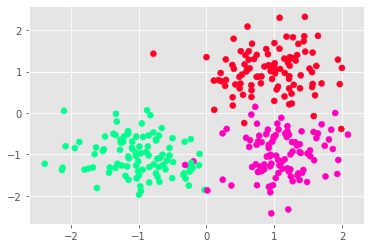

In [4]:
plt.scatter(x[:,0],x[:,1], c = labels, cmap = "gist_rainbow")
plt.show()

In [5]:
?AffinityPropagation

In [6]:
af = AffinityPropagation(preference=-50).fit(x) # Para calcular la afinidad. Modelo de propagación de la afinidad
cluster_center_ids = af.cluster_centers_indices_# Los índices de los centros
cluster_center_ids #Índices

array([113, 171, 220], dtype=int64)

In [7]:
?metrics.homogeneity_score

In [8]:
def report_affinity_propagation(x):
    af = AffinityPropagation(preference=-50).fit(x) # Para calcular la afinidad. Modelo de propagación de la afinidad
    cluster_center_ids = af.cluster_centers_indices_# Los índices de los centros
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_ # Las etiquetas que predice
    print("Número de Cluster: {}".format(len(cluster_center_ids)))
    print("Homogenidad: {:.3f}".format(metrics.homogeneity_score(labels, clust_labels)))
    print("Completitud: {:.3f}".format(metrics.completeness_score(labels, clust_labels)))
    print("V-Measure {:.3f}".format(metrics.v_measure_score(labels, clust_labels)))
    print("R2 Ajustado {:.3f}".format(metrics.adjusted_rand_score(labels, clust_labels)))
    print("Información mutua ajustada: {:.3f}".format(metrics.adjusted_mutual_info_score(labels,clust_labels)))
    print("Coeficiente de la silueta: {:.3f}".format(metrics.silhouette_score(x,labels,metric = "sqeuclidean")))
    
    plt.figure(figsize = (16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')    
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = x[cluster_center_ids[k]]
        plt.plot(x[class_members,0],x[class_members,1], col+"x")
        plt.plot(clust_center[0],clust_center[1],"o",markerfacecolor = col, markeredgecolor = "black", markersize = 14)
        for k in x[class_members]:
            plt.plot([clust_center[0],k[0]],[clust_center[1],k[1]])
    plt.title("Número Estimado de Clusters: {} ".format(n_clust))
    plt.show()

Número de Cluster: 3
Homogenidad: 0.888
Completitud: 0.889
V-Measure 0.889
R2 Ajustado 0.922
Información mutua ajustada: 0.888
Coeficiente de la silueta: 0.755


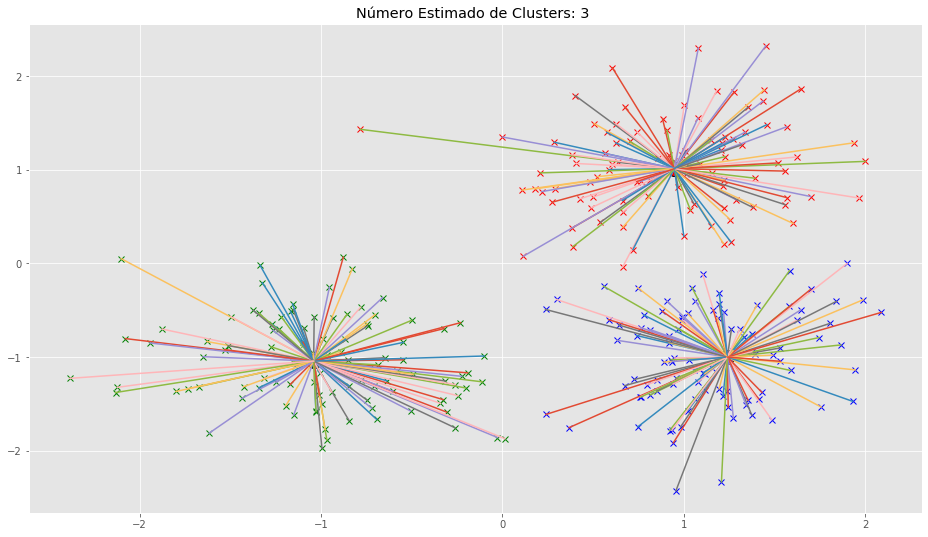

In [9]:
report_affinity_propagation(x)

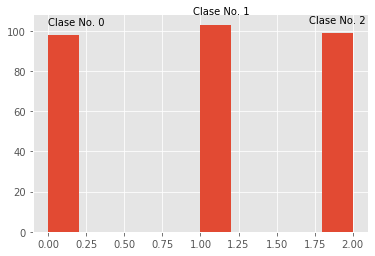

In [10]:
Value,Class,_ = plt.hist(af.labels_)
Val = [Value !=0]
Value = Value[Val]
Class = Class[:-1][Val]
for k in range(len(af.cluster_centers_)):
    plt.text(Class[k]*.95,Value[k]*1.05,"Clase No. {}".format(k))
plt.show()
